In [1]:
import numpy as np
import pandas as pd

happy_만족도 = pd.read_excel('data4/삶의만족도.xlsx')
happy_건강   = pd.read_excel('data4/건강.xlsx')
happy_경제   = pd.read_excel('data4/경제.xlsx')
happy_사회참여 = pd.read_excel('data4/사회참여.xlsx')
happy_교육   = pd.read_excel('data4/교육.xlsx')
happy_안전   = pd.read_excel('data4/안전.xlsx')
happy_여가   = pd.read_excel('data4/여가.xlsx')
happy_환경   = pd.read_excel('data4/환경.xlsx')


In [2]:
happy_df = happy_만족도.copy()



In [3]:
happy_df['건강'] = happy_건강['평균']
happy_df['경제'] = happy_경제['평균']
happy_df['사회참여'] = happy_사회참여['평균']
happy_df['교육'] = happy_교육['평균']
happy_df['안전'] = happy_안전['평균']
happy_df['여가'] = happy_여가['평균']
happy_df['환경'] = happy_환경['평균']

happy_df.rename(columns={'평균': '삶의 만족도'}, inplace=True)



In [4]:
happy_df['삶의 만족도'].fillna(
    happy_df['삶의 만족도'].mean(),
    inplace=True
)


C:\Users\it\AppData\Local\Temp\ipykernel_9140\2141006803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  happy_df['삶의 만족도'].fillna(


In [5]:
happy_df1 = happy_df.dropna()
happy_df.info()
happy_df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      229 non-null    int64  
 1   시도      229 non-null    object 
 2   구군      229 non-null    object 
 3   삶의 만족도  229 non-null    float64
 4   건강      228 non-null    float64
 5   경제      228 non-null    float64
 6   사회참여    228 non-null    float64
 7   교육      228 non-null    float64
 8   안전      228 non-null    float64
 9   여가      228 non-null    float64
 10  환경      228 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 19.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 228
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      223 non-null    int64  
 1   시도      223 non-null    object 
 2   구군      223 non-null    object 
 3   삶의 만족도  223 non-null    float64
 4   건강      223 non-null    

In [6]:
happy_df1.describe()


,No,삶의 만족도,건강,경제,사회참여,교육,안전,여가,환경
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,114.950673,0.495216,0.405873,0.392500,0.470994,0.542274,0.455517,0.463204,0.577374
std,65.925239,0.267121,0.181590,0.211245,0.199592,0.235800,0.190406,0.229254,0.181753
min,1.000000,0.005200,0.005500,0.008600,0.009400,0.013900,0.031100,0.023800,0.073300
25%,59.500000,0.292850,0.268300,0.230850,0.339250,0.370550,0.313850,0.278200,0.455200
50%,115.000000,0.487900,0.389700,0.378800,0.473200,0.563200,0.446100,0.447800,0.598700
75%,170.500000,0.699550,0.525100,0.513150,0.617850,0.730250,0.602500,0.647400,0.701300
max,229.000000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
happy_df1['시도'].value_counts()


시도
경기도        31
서울특별시      25
경상북도       21
전라남도       21
강원도        18
경상남도       18
부산광역시      15
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       6
광주광역시       5
대전광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [8]:

happy_df1.groupby('시도')[['삶의 만족도', '건강']].agg(
    mean_삶의만족도=('삶의 만족도', 'mean'),
    sum_건강=('건강', 'sum')
)





,mean_삶의만족도,sum_건강
시도,,
강원도,0.619506,5.9311
경기도,0.426023,10.9725
경상남도,0.530794,5.6290
경상북도,0.477836,5.7118
광주광역시,0.484480,3.1615
대구광역시,0.432833,3.2309
대전광역시,0.407580,3.3179
부산광역시,0.365787,7.7561
서울특별시,0.490972,14.2383


In [9]:
happy_df1.groupby('시도').agg(
    삶의만족도_mean=('삶의 만족도', 'mean'),
    건강_mean=('건강', 'mean'),
    건강_median=('건강', 'median'),
    건강_sum=('건강', 'sum'),
    건강_std=('건강', 'std')
)


,삶의만족도_mean,건강_mean,건강_median,건강_sum,건강_std
시도,,,,,
강원도,0.619506,0.329506,0.33995,5.9311,0.096995
경기도,0.426023,0.353952,0.32590,10.9725,0.143195
경상남도,0.530794,0.312722,0.26660,5.6290,0.132623
경상북도,0.477836,0.271990,0.30520,5.7118,0.143078
광주광역시,0.484480,0.632300,0.69130,3.1615,0.166054
대구광역시,0.432833,0.538483,0.41670,3.2309,0.303610
대전광역시,0.407580,0.663580,0.63500,3.3179,0.133533
부산광역시,0.365787,0.517073,0.55590,7.7561,0.206349
서울특별시,0.490972,0.569532,0.58980,14.2383,0.147599


In [10]:
data = happy_df1[[
    '삶의 만족도', '건강', '경제', '사회참여',
    '교육', '안전', '여가', '환경'
]]



In [11]:
data = data.rename(columns={'삶의 만족도': '만족도'})

data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 228
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   만족도     223 non-null    float64
 1   건강      223 non-null    float64
 2   경제      223 non-null    float64
 3   사회참여    223 non-null    float64
 4   교육      223 non-null    float64
 5   안전      223 non-null    float64
 6   여가      223 non-null    float64
 7   환경      223 non-null    float64
dtypes: float64(8)
memory usage: 15.7 KB


In [13]:
from statsmodels.formula.api import ols


data = (
    happy_df1[[
        '삶의 만족도', '건강', '경제', '사회참여',
        '교육', '안전', '여가', '환경'
    ]]
    .rename(columns={'삶의 만족도': '만족도'})
)


regression_result = ols(
    '만족도 ~ 건강 + 경제 + 사회참여 + 교육 + 안전 + 여가 + 환경',
    data=data
).fit()


regression_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    만족도   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     6.941
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           1.87e-07
Time:                        09:34:39   Log-Likelihood:                 1.1660
No. Observations:                 223   AIC:                             13.67
Df Residuals:                     215   BIC:                             40.93
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0407      0.118     -0.343      0.732      -0.274       0.193
건강             0.1385      0.095      1.464      0.145      -0.048       0.325
경제             0.0789      0.106      0.747      0.456      -0.129       0.287
사회참여           0.1961      0.090      2.178      0.030       0.019       0.374
교육            -0.0434      0.082     -0.529      0.598      -0.205       0.118
안전             0.0564      0.104      0.540      0.590      -0.149       0.262
여가             0.1731      0.086      2.012      0.045       0.004       0.343
환경             0.4746      0.126      3.775      0.000       0.227       0.722
==============================================================================
Omnibus:                        5.538   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.994
Skew:                          -0.192   Prob(JB):                        0.136
Kurtosis:                       2.469   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

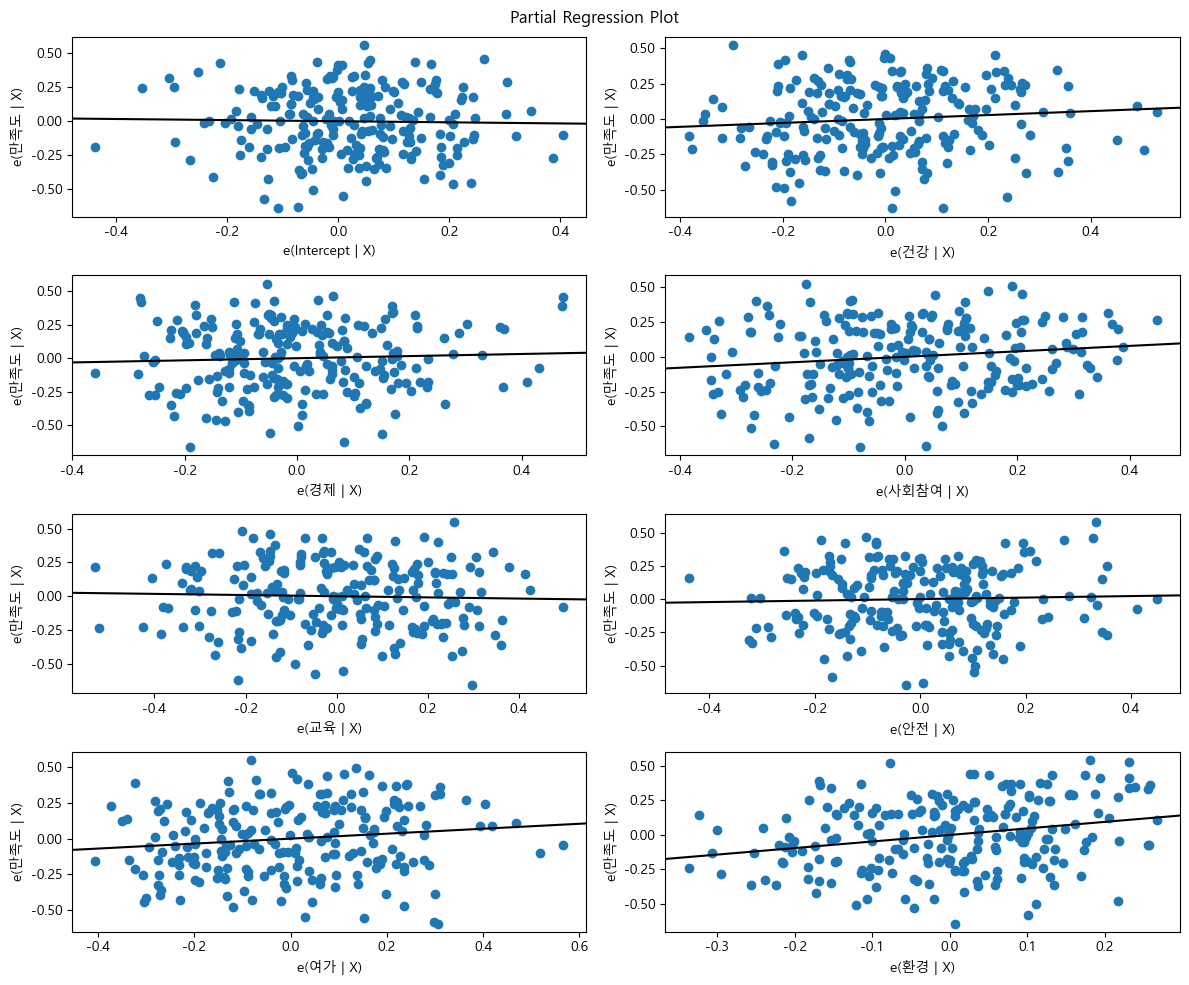

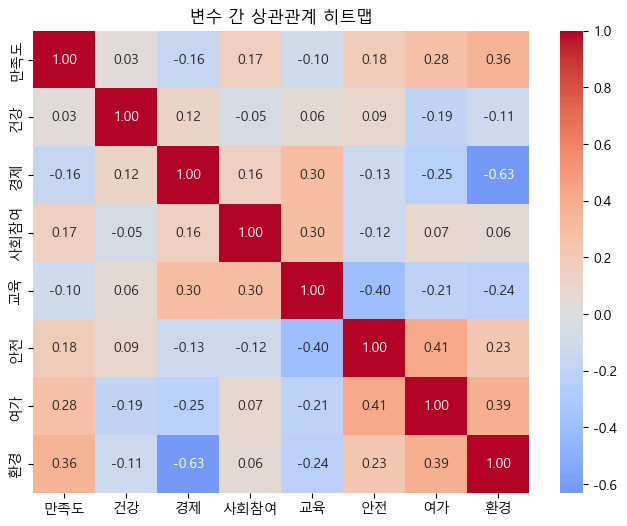

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 부분회귀 플롯 (Partial Regression Plot)
fig = plt.figure(figsize=(12, 10))
plot_partregress_grid(regression_result, fig=fig)
plt.tight_layout()
plt.show()

# 2. 상관계수 계산
corr = data.corr()

# 3. 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("변수 간 상관관계 히트맵")
plt.show()
